# **Naive Bayes**

Naive Bayes is a type of algorithm that help us **classify **things into
categories, like deciding if an email is **spam or non spam**. It’s called
**“Naive”**, because it assumes that all the features (or piece of information)
we used to make the **decision are independent** of each other, even though
that might not always be true in reality

 It’s based on ,
 * Bayes’ theorem
 * The naive assumption

1. **Bayes’ theorem**:

 This is the main idea behind Naive Bayes. It helps us calculate the
probability of something happening based on **prior knowledge.**

Eg:If we know how often an email is usually spam and how often certain
words appear in spam emails, we can guess whether a new email is spam
based on the words it contains.

 2. **The Naive assumption**:

 Naive Bayes assumes that each features (like each word in an email)
contributes independently to whether the email is spam or not(Ham).

# **Types :**
 1. **Gaussian Naive Bayes** :

               Used when the data is continuous and follows a **bell-shaped curve**
(like height or test scores).Used for **Large Data**

2. **Multinomial Naive Bayes**:

       Used for counting things like the no.of times a word appear in a
document.**Spam Detection**

3. **Bernoulli Naive Bayes**:

       Used when features are **binary** , meaning they’re either there or not
(like the presence or absence of a word).

**Advantages**:
 * Simple and fast
* Good with lots of features
 * Low data requirements

**Applications**:
 * Spam detection
 * Sentiment analysis
 * Medical diagnosis

# **Count Vectorizer**

 Typically used for text data. It is used for converting **text data  into numerical data**.
 * It creates a bag of words by counting how often each word appear in
the text.
 * ML algorithm cannot work directly with text, so we need to convert
text into numbers(features) that can be used in models.
 * It first identifies all the unique words in the text and builds a
**dictionary of words**. Then convert the text data into numerical matrix ,
each row represents a document and each column represents a word
from the vocabulary

Eg:
   
I love apples

 I love oranges

 Apples are delicious

**After applying countvectorizer**,

 I - 2 occurrence

 Love - 2 occurrence

 Apples -2 occurrence

 Oranges- 1 occurrence

 Are -1 occurrence

 Delicious - 1 occurrence

 The transformed output will be a matrix how many times each word appears in each
document. Now your data is ready to be used by ML algorithms.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
df=df.drop(columns=['PassengerId','Name','Cabin'])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,female,35.0,1,0,113803,53.1000,S,1
4,3,male,35.0,0,0,373450,8.0500,S,0


In [ ]:
df.isna().sum()

,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2
Survived,0


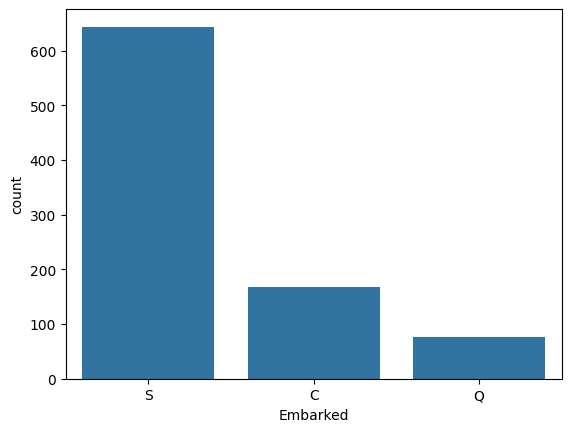

In [ ]:
sn.countplot(df,x='Embarked')
plt.show()

In [ ]:
df['Embarked']=df['Embarked'].fillna('S')

In [ ]:
df['Age']=df['Age'].fillna((df['Age'].mean()))

In [ ]:
df.isna().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0
Survived,0


In [ ]:
df.dtypes

,0
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Embarked,object
Survived,int64


In [ ]:
label_encoder=preprocessing.LabelEncoder()
for i in df:
  df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df.dtypes

,0
Pclass,int64
Sex,int64
Age,int64
SibSp,int64
Parch,int64
Ticket,int64
Fare,int64
Embarked,int64
Survived,int64


In [ ]:
x=df.drop(columns='Survived')
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,1,28,1,0,523,18,2
1,0,0,52,1,0,596,207,0
2,2,0,34,0,0,669,41,2
3,0,0,48,1,0,49,189,2
4,2,1,48,0,0,472,43,2


In [ ]:
y=df['Survived']
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=5)

In [ ]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

In [ ]:
model=BernoulliNB()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1])

In [ ]:
a=model.score(x_test,y_test)
print(f'Accuracy of the model : {np.round((a*100),2)}%')

Accuracy of the model : 80.72%


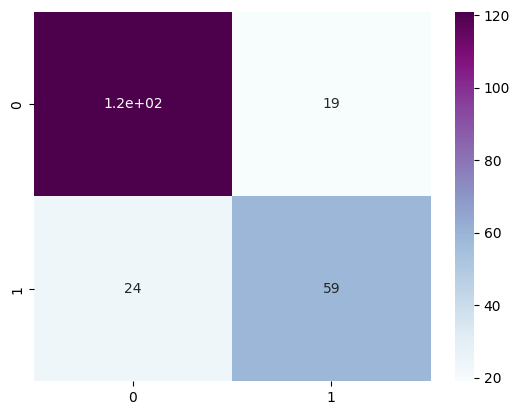

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       0.83      0.86      0.85       140\n           1       0.76      0.71      0.73        83\n\n    accuracy                           0.81       223\n   macro avg       0.80      0.79      0.79       223\nweighted avg       0.81      0.81      0.81       223\n'

In [ ]:
mse=mean_squared_error(y_test,pred_y)
print(f'{mse:.2f}')

0.19


In [ ]:
x.head()
a=pd.DataFrame([[2,1,23,1,0,520,521,1]])
p=model.predict(a)
if p==0:
  print('Not Survived')
else:
  print("Survived")

Not Survived


# **Example 2(Spam Detection)**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Camerin DSML/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isna().sum()

,0
Category,0
Message,0


In [ ]:
df.dtypes

,0
Category,object
Message,object


In [ ]:
df['spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [ ]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df=df.drop(columns='Category')
df.head()

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
x=df.drop(columns='spam')
#x=df.spam
x.head()

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
y=df['spam']
#y=df.spam
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()
x_train_vector=cv.fit_transform(x_train['Message'])
#x_train_vector=cv.fit_transform(x_train.values)
x_train_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 55372 stored elements and shape (4179, 7449)>

In [ ]:
x_train.values

array([["Ok I'm gonna head up to usf in like fifteen minutes"],
       ["That's a shame! Maybe cld meet for few hrs tomo?"],
       ['Will do. Was exhausted on train this morning. Too much wine and pie. You sleep well too'],
       ...,
       ['U have won a nokia 6230 plus a free digital camera. This is what u get when u win our FREE auction. To take part send NOKIA to 83383 now. POBOX114/14TCR/W1 16'],
       ['Jordan got voted out last nite!'],
       ['Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.']],
      dtype=object)

In [ ]:
pd.DataFrame(x_train_vector.toarray(),columns=cv.get_feature_names_out())

,00,000,000pes,008704050406,0089,0121,01223585334,0125698789,02,0207,02072069400,02073162414,02085076972,021,03,04,05,050703,0578,06,07,07046744435,07090201529,07099833605,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07781482378,07786200117,077xxx,078,07801543489,07808247860,07815296484,07821230901,078498,...,you,youdoing,youi,young,younger,youphone,your,youre,yourinclusive,yourjob,yours,yourself,youuuuu,youwanna,yoville,yowifes,yr,yrs,ystrday,ything,yummmm,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zeros,zoe,zogtorius,zoom,zouk,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model=MultinomialNB()
model.fit(x_train_vector,y_train)
model.score(cv.transform(x_test['Message']),y_test)
#model.score(cv.transform(x_test),y_test)

0.9741564967695621

In [ ]:
emails=['congratulations','you won','how are you','Free entry in 2 a wkly comp to win FA Cup finala']

In [ ]:
email=cv.transform(emails)

In [ ]:
model.predict(email)

array([1, 0, 0, 1])

In [ ]:
# email=cv.transform(emails)
# predictions = model.predict(email)

# for p in predictions:
#   if p == 0:
#     print('Ham')
#   else:
#     print('Spam')

# **Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
p=Pipeline([('v',CountVectorizer()),('mnb',MultinomialNB())])

In [ ]:
p.fit(x_train['Message'],y_train)
#p.fit(x_train,y_train)
Pipeline(steps=[('v',CountVectorizer()),('mnb',MultinomialNB())])

Pipeline(steps=[('v', CountVectorizer()), ('mnb', MultinomialNB())])

In [ ]:
p.score(x_test['Message'],y_test)
#p.fit(x_test,y_test)

0.9741564967695621

In [ ]:
p.predict(x_train['Message'])
#p.predict(x_train)

array([0, 0, 0, ..., 1, 0, 1])

# **Example 3**

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
w=load_wine()
w

In [ ]:
df=pd.DataFrame(w.data,columns=w.feature_names)
df['target']=w.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.dtypes

,0
alcohol,float64
malic_acid,float64
ash,float64
alcalinity_of_ash,float64
magnesium,float64
total_phenols,float64
flavanoids,float64
nonflavanoid_phenols,float64
proanthocyanins,float64
color_intensity,float64


In [ ]:
x=df.drop(columns='target')
x.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
y=df.target
y.head()

,target
0,0
1,0
2,0
3,0
4,0


<Axes: xlabel='target', ylabel='count'>

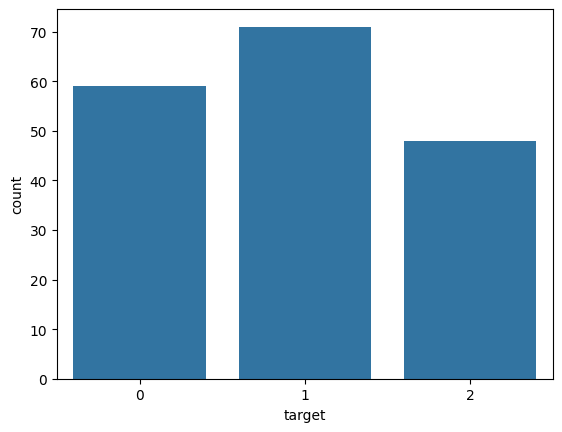

In [ ]:
sn.countplot(df,x='target')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

pred_y=model.predict(x_test)
pred_y

array([0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 1])

In [ ]:
a=model.score(x_test,y_test)
print(f'Accuracy of the model : {np.round((a*100),2)}%')

Accuracy of the model : 97.22%


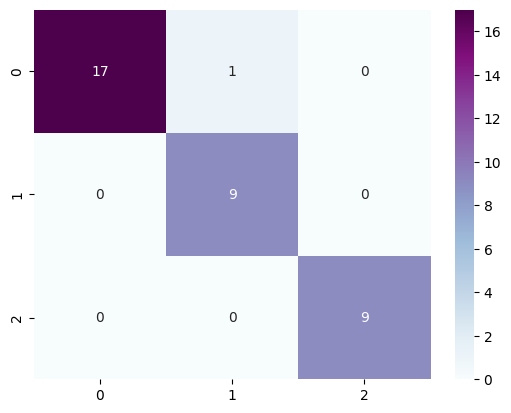

In [ ]:
cm=confusion_matrix(y_test,pred_y)
cm
sn.heatmap(cm,annot=True,cmap='BuPu')
plt.show()

In [ ]:
classification_report(y_test,pred_y)

'              precision    recall  f1-score   support\n\n           0       1.00      0.94      0.97        18\n           1       0.90      1.00      0.95         9\n           2       1.00      1.00      1.00         9\n\n    accuracy                           0.97        36\n   macro avg       0.97      0.98      0.97        36\nweighted avg       0.98      0.97      0.97        36\n'

In [ ]:
mse=mean_squared_error(y_test,pred_y)
print(f'{mse:.2f}')

0.03


In [ ]:
x.head()
a=pd.DataFrame([[14.23,1.15,3,16.12,130,1.56,3.45,0.012,2.25,5.68,1.05,4.56,1078]],columns=x_train.columns)
p=model.predict(a)
print(p)

[0]
